In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from pathlib import Path

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import AgglomerativeClustering


pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [3]:
imagepath = Path('../images/')
datapath = Path('../data')
full = 'cleaned_full_1.csv'
survey = 'features_not_scaled.csv'

In [5]:
df = pd.read_csv(datapath/full)

In [6]:
# Lists of individual sections

moa = [c for c in df.columns if 'moa' in c]
idea = [c for c in df.columns if 'idea' in c]
swb = [c for c in df.columns if 'swb' in c]
mindful = [c for c in df.columns if 'mindful' in c]
belong = [c for c in df.columns if 'belong' in c]
efficacy = [c for c in df.columns if 'efficacy' in c]
support = [c for c in df.columns if 'support' in c]
transgres = [c for c in df.columns if 'transgres' in c]
exploit = [c for c in df.columns if 'exploit' in c]
stress = [c for c in df.columns if 'stress' in c]
marriage = [c for c in df.columns if 'marriage' in c]

# demographics
socmedia = [c for c in df.columns if 'socmedia' in c]
usdream = [c for c in df.columns if 'usdream' in c]
demo = [c for c in df.columns if 'demo' in c]
disability = [c for c in df.columns if 'disability' in c]
phys = [c for c in df.columns if 'phys' in c]

# Cols to use as features
skip = ['bias', 'duration']
mind_feats = [c for c in mindful if not any(s in c for s in skip)]
sup_feats = [c for c in support if not any(s in c for s in skip)]

sibs = [c for c in demo if 'sibs' in c]
parents = [c for c in demo if 'parents' in c]
fam_feats = parents+sibs

feat_lists = [mind_feats, sup_feats, fam_feats]

# Cols to use as targets
targets = [c for c in df.columns if 'target' in c] + ['belong_now', 'demo_politics']


In [26]:
skip = ['bias', 'duration']
support_ques = [c for c in support if not any(s in c for s in skip)]

In [51]:
scaler = StandardScaler()
X = df[support_ques]
X = scaler.fit_transform(X)

pcd = PCA(.90, svd_solver='full').fit(X)

In [52]:
sum(pcd.explained_variance_ratio_)

0.9127151320477815

In [78]:
abs(pcd.components_)

array([[0.30239696, 0.29797693, 0.26892061, 0.27618823, 0.29056153,
        0.29589093, 0.30112611, 0.26994456, 0.3061237 , 0.29070116,
        0.26442113, 0.29581369],
       [0.34917431, 0.37735813, 0.34887706, 0.3172809 , 0.39011757,
        0.09504431, 0.08169134, 0.3058286 , 0.05183314, 0.37213801,
        0.32502158, 0.07108885],
       [0.14488758, 0.14759338, 0.25135535, 0.29599024, 0.14947048,
        0.40573316, 0.40764064, 0.27616906, 0.37283295, 0.17102102,
        0.24811074, 0.38369447],
       [0.08735479, 0.01926467, 0.34890478, 0.33739132, 0.00850683,
        0.04187763, 0.00888486, 0.60492991, 0.01592146, 0.11974619,
        0.60597147, 0.08240912],
       [0.05289791, 0.05857348, 0.13589876, 0.11930441, 0.02091839,
        0.50394685, 0.4060419 , 0.06348205, 0.32970825, 0.03727463,
        0.20716516, 0.62028591],
       [0.04789197, 0.08094397, 0.01671158, 0.1591697 , 0.01500068,
        0.23514444, 0.02019052, 0.11227015, 0.77363485, 0.07002656,
        0.0653747 ,

In [58]:
for pc in abs(pcd.components_):
    print(np.argsort(pc)[::-1])

[ 8  0  6  1  5 11  9  4  3  7  2 10]
[ 4  1  9  0  2 10  3  7  5  6 11  8]
[ 6  5 11  8  3  7  2 10  9  4  1  0]
[10  7  2  3  9  0 11  5  1  8  6  4]
[11  5  6  8 10  2  3  7  1  0  9  4]
[ 8 11  5  3  7  1  9 10  0  6  2  4]


In [72]:
top3idxs = np.argsort(abs(pcd.components_),axis=1)[:,-3:]
val, count = np.unique(top3idxs, return_counts=True)

In [73]:
val

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11])

In [75]:
top = val[count>1]

In [76]:
df[support_ques].columns[top]

Index(['support_6', 'support_7', 'support_9', 'support_12'], dtype='object')

In [79]:
survey_df = pd.read_csv(datapath/survey)

In [81]:
scaler = StandardScaler()
X = survey_df
X = scaler.fit_transform(X)

pcd = PCA(2).fit(X)

In [82]:
Xt = pcd.transform(X)

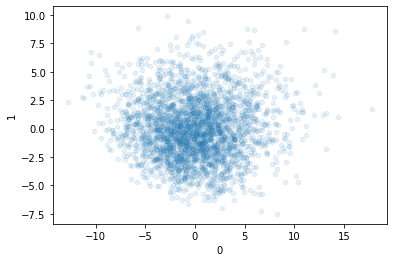

In [85]:
two_comps = pd.DataFrame(Xt)
ax = two_comps.plot(x=0, y=1, kind='scatter', alpha=0.1)